# Análise exploratória de dados

In [ ]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

In [33]:
#Leitura do conjunto de dados
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


O **Titanic** foi o navio da companhia de navegação White Star Lines, que naufragou na parte norte do Oceano Atlântico, em 1912. O naufrágio aconteceu após o navio bater em um iceberg, o que provocou a morte de cerca de 1500 pessoas.
O conjunto de dados contém informações de 891 pessoas, com informações a respeito dos passageiros, como classe, local de embarque e sobreviventes.

In [34]:
#Dicionário de dados

dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Sobreviventes ou não do passageiro,quantitativa,discreta
1,pclass,Número da classe do passageiro,quantitativa,discreta
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,discreta
4,sibsp,Quantidade de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Quantidade de pais / crianças a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,discreta
7,embarked,Sigla do porto de Embarque,qualitativa,nominal
8,class,Nome da classe do passageiro,qualitativa,ordinal
9,who,Classificação do passageiro,qualitativa,nominal


São 15 variáveis, com 7 qualitativas nominais, 2 qualitativas ordinais e 6 quantitativas discretas.

## 2. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre a classe, o gênero e os sobreviventes do naufrágio?
- Existe alguma relação entre tarifa, andar e classe dos passageiros?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [35]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes e, além disso, temos `{number_of_na_rows}` linhas com valores faltantes."
    "\n\n ---"
))

df.dropna(inplace=True)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['age', 'embarked', 'deck', 'embark_town']`contém valores faltantes e, além disso, temos `709` linhas com valores faltantes.

 ---

In [22]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,182.000000,182.000000,182,182.000000,182.000000,182.000000,182.000000,182,182,182,182,182,182,182,182
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,First,man,False,C,Southampton,yes,False
freq,NaN,NaN,94,NaN,NaN,NaN,NaN,115,157,87,95,51,115,123,104
mean,0.675824,1.192308,NaN,35.623187,0.467033,0.478022,78.919735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.469357,0.516411,NaN,15.671615,0.645007,0.755869,76.490774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.920000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,24.000000,0.000000,0.000000,29.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,NaN,36.000000,0.000000,0.000000,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,1.000000,NaN,47.750000,1.000000,1.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Existem 3 portos de embarque possíveis, 3 classes possíveis, 3 categorias de passageiros possíveis e 7 andares.
- Haviam mais passageiros do sexo masculino, em sua maioria adolescentes.
- Nesse conjunto de dados, há mais sobreviventes e pessoas que foram acompanhadas.
- Mais pessoas embarcaram em Southampton, em comparação aos outros portos
- Embarcaram mais pessoas no andar C e na Primeira Classe.
- A média de sobreviventes foi de 0.675824 e de idade dos passageiros foi de 35.623187.
- A média das tarifas pagas para o embarque foi de 78.919735.

#### Distribuição das variáveis qualitativas 

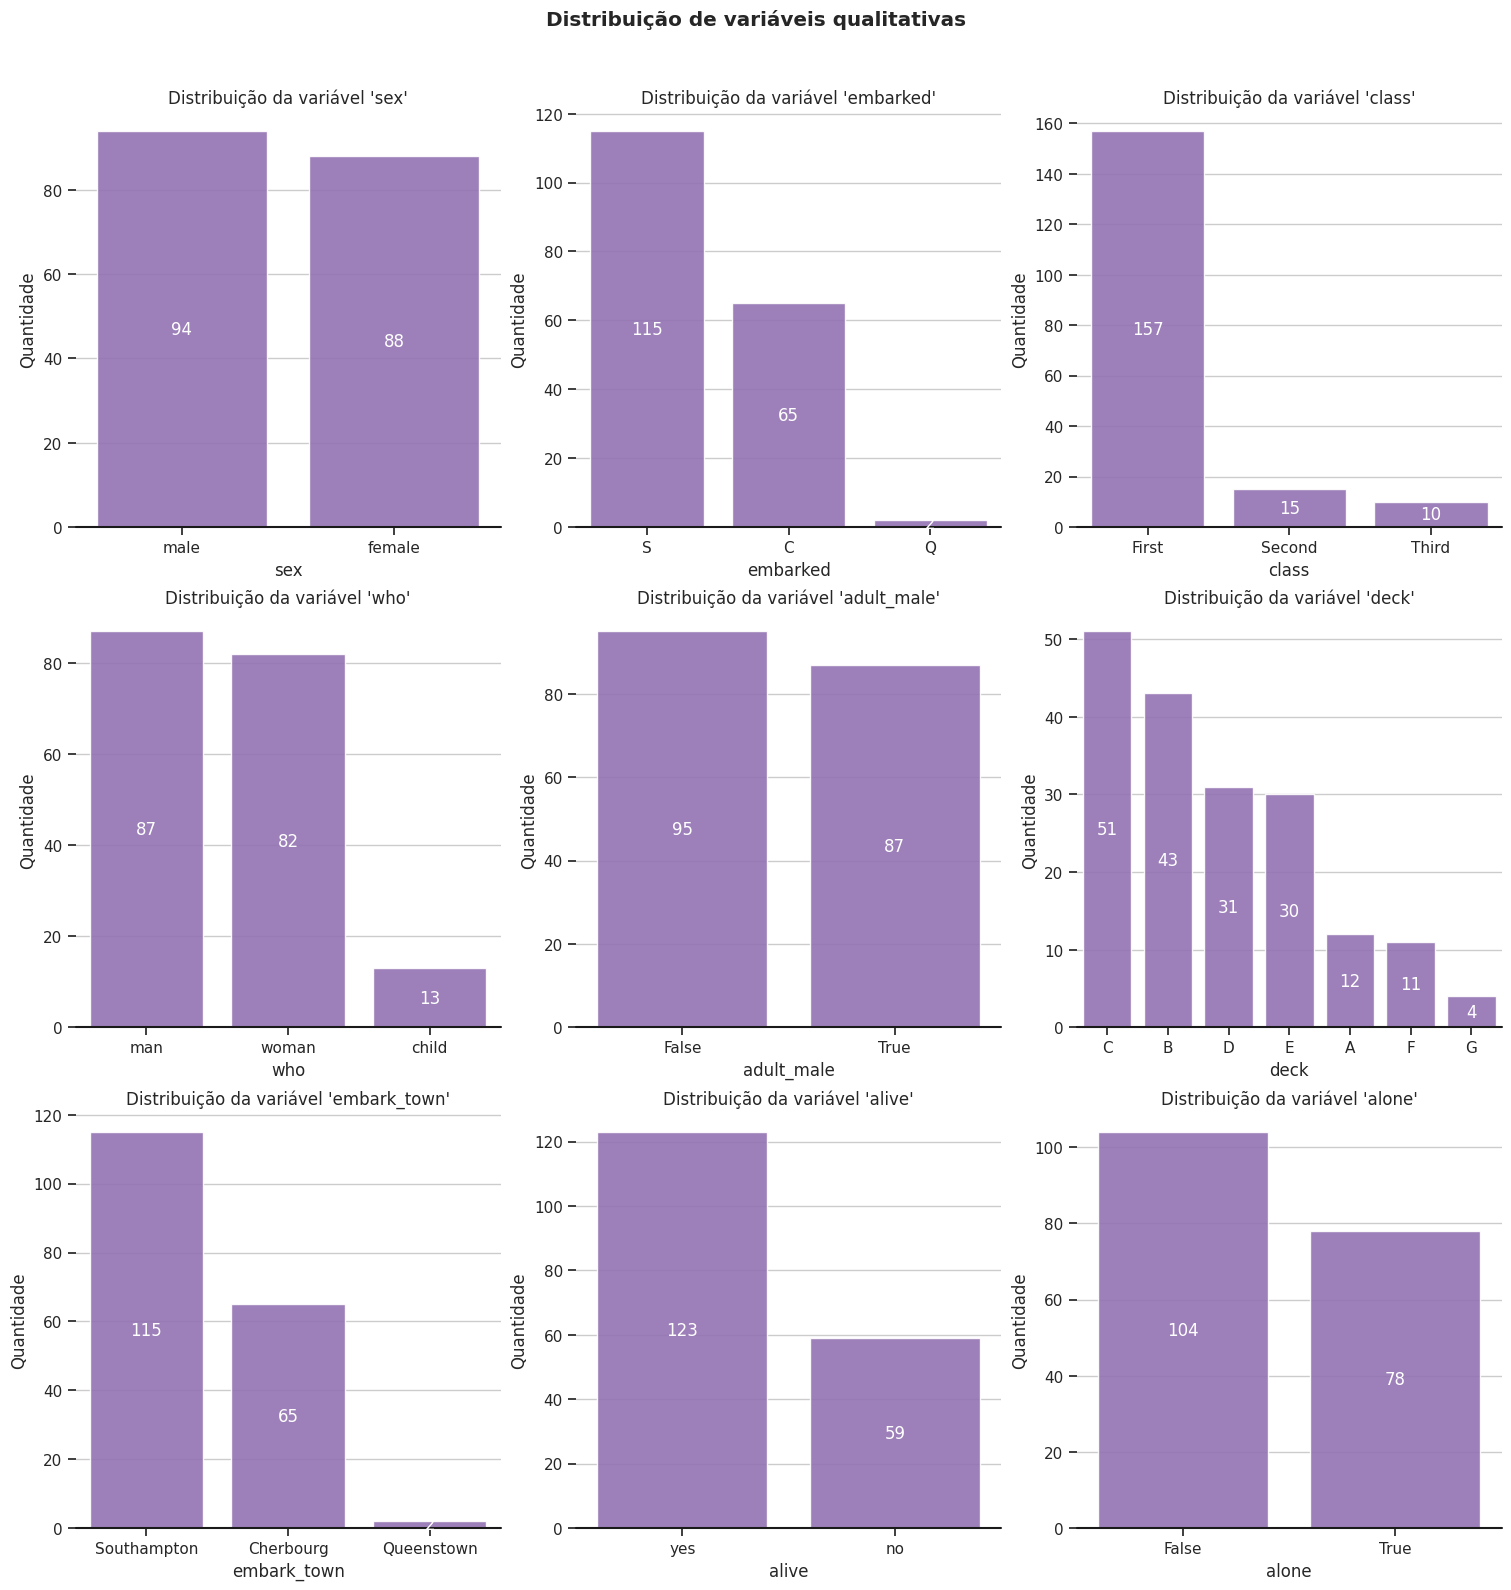

In [26]:
variaveis_qualitativas = dicionario.query("tipo == 'qualitativa'").variavel.to_list()
num_qualitativas = len(variaveis_qualitativas)

num_cols = 3
num_rows = (num_qualitativas + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold', y=1.05)

axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes[i],
        color=colors[0], 
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- A maioria dos passageiros eram homens e mulheres e a minoria crianças.
- As cidades de Southampton e Cherbourg tiveram a maioria dos embarques, com Southampton liderando.
- Observamos que o deck G, era o menos acessado.
- Nesse conjunto de dados, haviam mais pessoas acompanhadas que sozinhas.

#### Distribuição das variáveis quantitativas

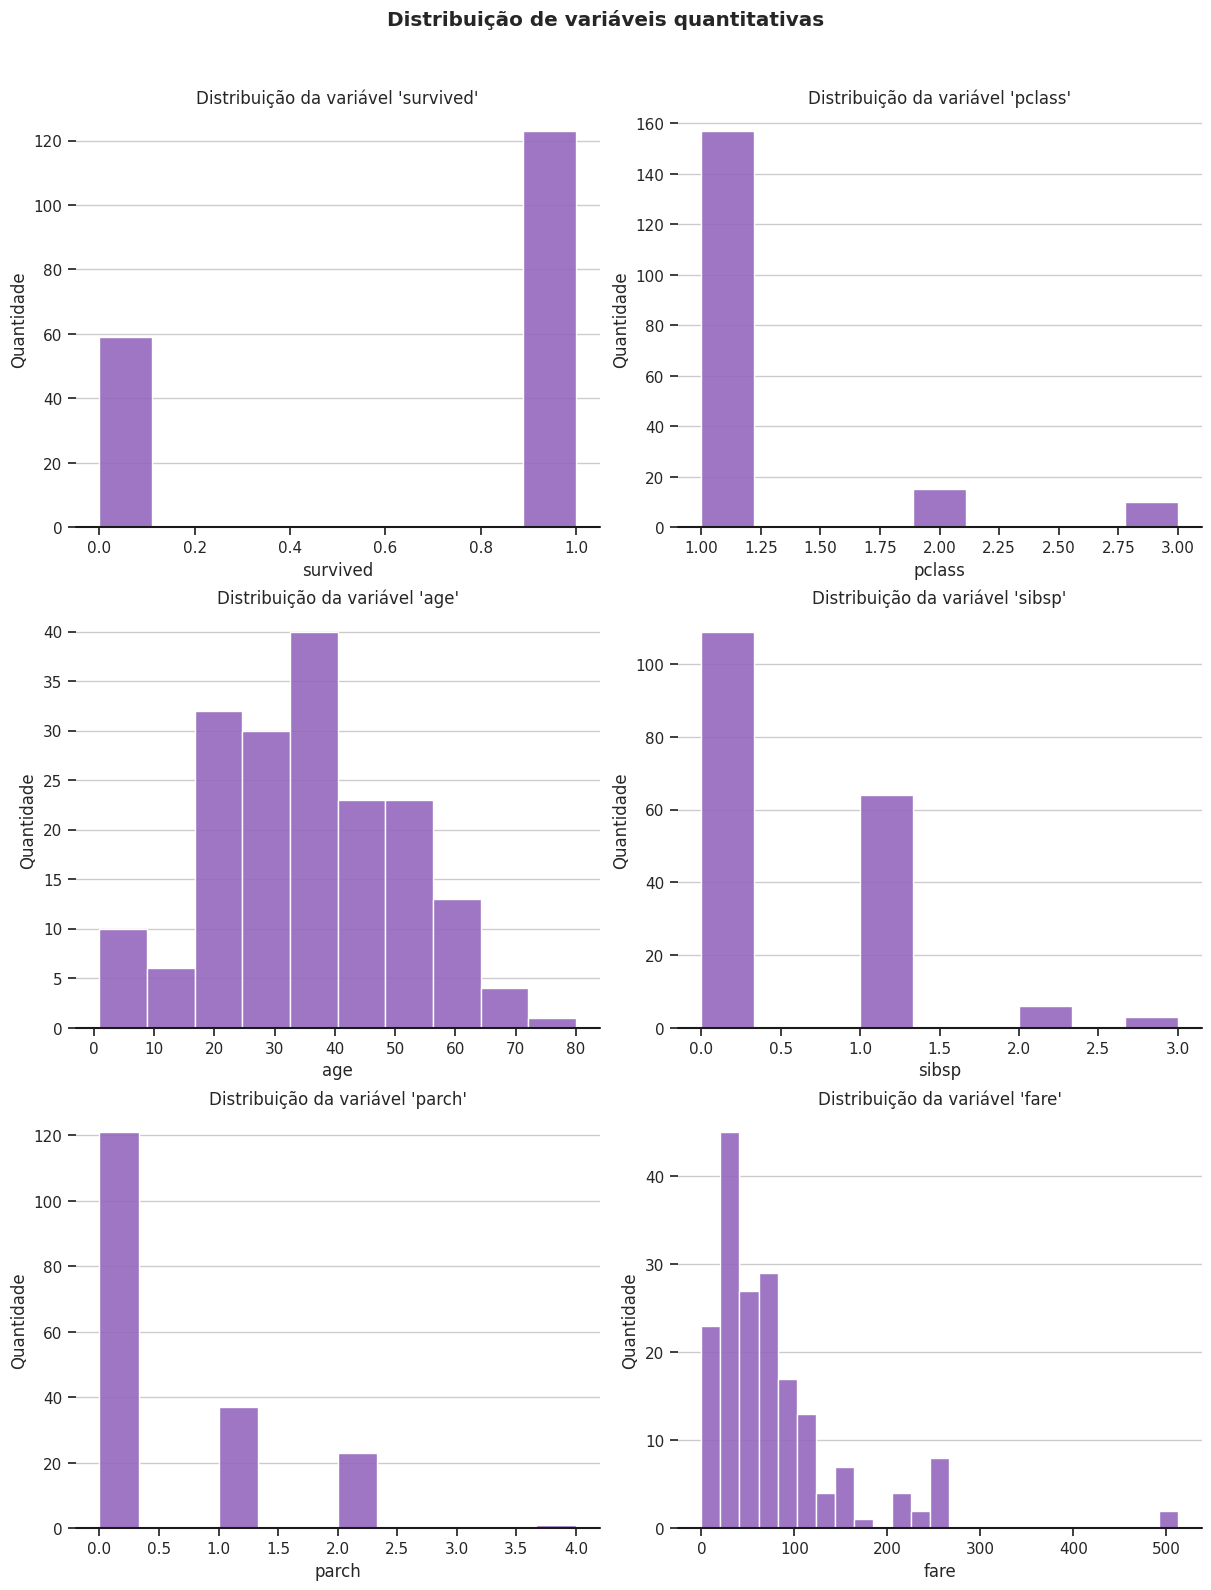

In [30]:
variaveis_quantitativas = dicionario.query("tipo == 'quantitativa'").variavel.to_list()
num_quantitativas = len(variaveis_quantitativas)

num_cols = 2
num_rows = (num_quantitativas + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows), constrained_layout=True)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold', y=1.05)

axes = axes.flatten()

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes[i],
        color=colors[0],  
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

- A distribuição das idades está mais frequente entre 20 e 50 anos.
- Os valores de irmãos/cônjuges dos passageiros está mais próxima de zero.
- Os valores de tarifa tendem a ser menores que 300.
- Nesse conjunto de dados, há mais passageiros primeira classe.

### Existe alguma relação entre a classe, o gênero e os sobreviventes do naufrágio?

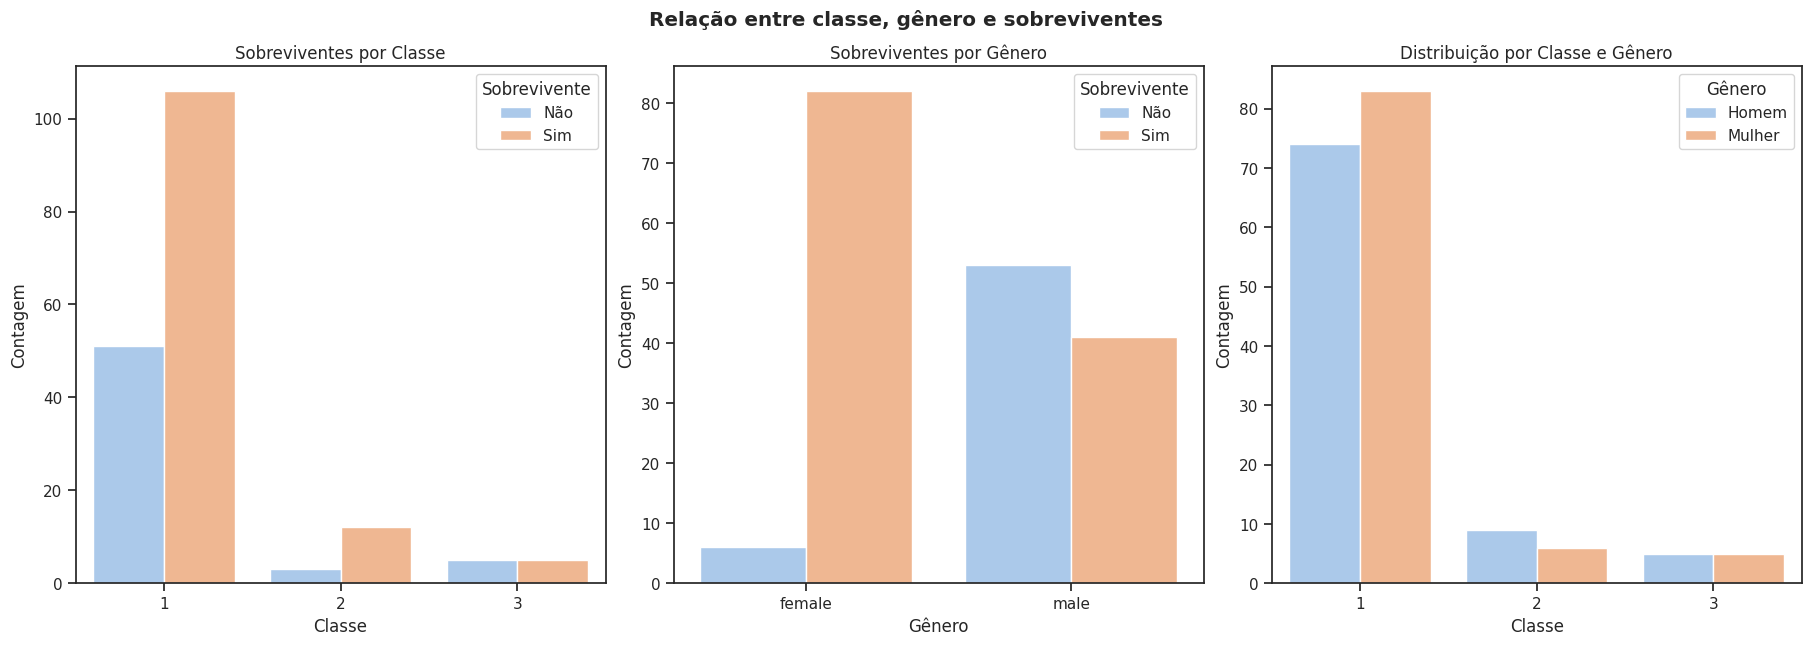

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.suptitle('Relação entre classe, gênero e sobreviventes', fontweight='bold', y=1.05)

ax1 = sns.countplot(
    data=df,
    x='pclass',
    hue='survived',
    ax=axes[0],
    palette='pastel'
)
ax1.set_title('Sobreviventes por Classe')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Contagem')
ax1.legend(title='Sobrevivente', labels=['Não', 'Sim'])

# Plotar a distribuição de sobreviventes por gênero
ax2 = sns.countplot(
    data=df,
    x='sex',
    hue='survived',
    ax=axes[1],
    palette='pastel'
)
ax2.set_title('Sobreviventes por Gênero')
ax2.set_xlabel('Gênero')
ax2.set_ylabel('Contagem')
ax2.legend(title='Sobrevivente', labels=['Não', 'Sim'])

ax3 = sns.countplot(
    data=df,
    x='pclass',
    hue='sex',
    ax=axes[2],
    palette='pastel',
    dodge=True
)
ax3.set_title('Distribuição por Classe e Gênero')
ax3.set_xlabel('Classe')
ax3.set_ylabel('Contagem')
ax3.legend(title='Gênero', labels=['Homem', 'Mulher'])

plt.show()

- Observamos que há mais sobreviventes na primeira e segunda classe, mas o número de sobreviventes e mortos se iguala na terceira classe
- Existem mais sobreviventes do sexo feminino
- A distribuição de sobreviventes por gênero varia em cada classe, na primeira há mais mulheres sobreviventes, na segunda mais homens sobreviventes e na terceira estão de igual para igual. 

#### Existe alguma relação entre tarifa, andar e classe do passageiro?

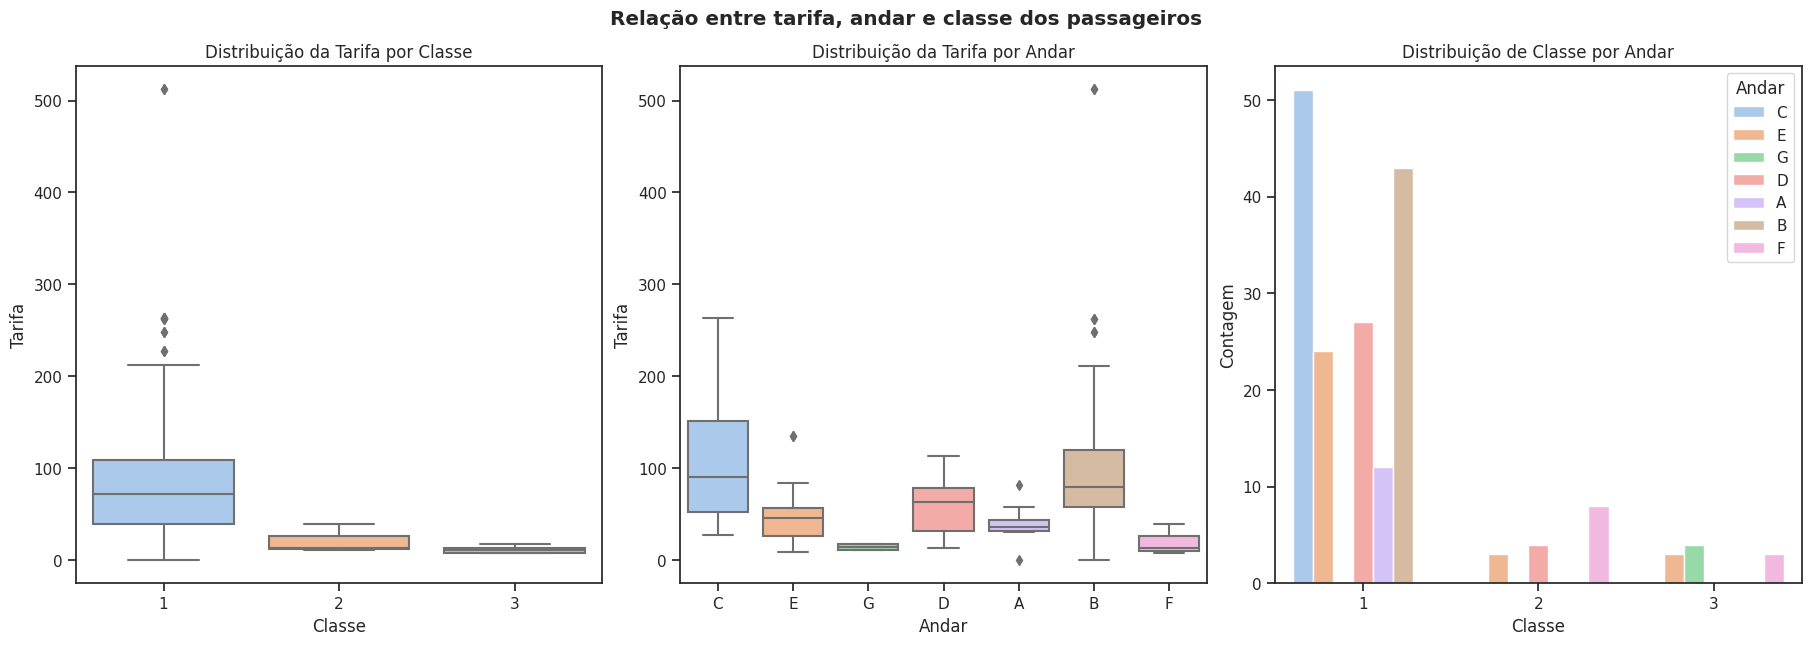

In [36]:
variaveis = ['fare', 'deck', 'pclass']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.suptitle('Relação entre tarifa, andar e classe dos passageiros', fontweight='bold', y=1.05)

ax1 = sns.boxplot(
    data=df,
    x='pclass',
    y='fare',
    ax=axes[0],
    palette='pastel'
)
ax1.set_title('Distribuição da Tarifa por Classe')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Tarifa')

ax2 = sns.boxplot(
    data=df,
    x='deck',
    y='fare',
    ax=axes[1],
    palette='pastel'
)
ax2.set_title('Distribuição da Tarifa por Andar')
ax2.set_xlabel('Andar')
ax2.set_ylabel('Tarifa')

ax3 = sns.countplot(
    data=df,
    x='pclass',
    hue='deck',
    ax=axes[2],
    palette='pastel'
)
ax3.set_title('Distribuição de Classe por Andar')
ax3.set_xlabel('Classe')
ax3.set_ylabel('Contagem')
ax3.legend(title='Andar')

plt.show()

- A primeira classe possui valores maiores de tarifa, com outliers, que a segunda e terceira classe, que possui um valor baixo pela tarifa.
- As tarifas do andar C possuem uma variedade de valores de tarifa maiores que a F, por exemplo, mas a B possui mais outliers.
- Passageiros da terceira classe estão concentrados no anndar G, F e E, há somente passageiros da terceira classe no andar G.
- As tarifas dos passageiros dos andares G, A e F estão concentradas abaixo de 100.
- Há somente passageiros de primeira classe nos andares A, B e C.

## 3. Insights

- As informações que conseguimos adquirir foram:
- A maioria dos sobreviventes foram mulheres.
- Haviam mais homens na segunda classe, porém uma quantidade maior de mulheres sobreviveu.
- Os passageiros tinham um número pequeno de crianças e idosos em comparação com passageiros de 20 a 50 anos.
- Houve um número bem maior de passageiros que embarcaram em Southampton e um grupo pequeno embarcou em Queenstown.
- A maioria dos passageiros não tinham familiares a bordo.
- Os passageiros da terceira classe estavam alojados em somente 3 andares.
- Passageiros do andar A pertenciam a primeira classe, porém pagaram menos de 100 em tarifa.
- Passageiros das 3 classes estavam alojados no andar E.